In [2]:
#Import libraries for analyis 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium 
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MeasureControl
from folium.plugins import FloatImage
%matplotlib inline 



# Data Overview 

In [3]:
#load the ride and station datasets

trips_df = pd.read_csv('Resources/la_metro_gbfs_trips_2017.csv')


stations_df = pd.read_csv('Resources/metro-bike-share-stations-2019-10-1.csv')


trips_df.head(5)

C:\Users\alao8\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,17059131,480,1/1/2017 0:15,1/1/2017 0:23,3030,34.051941,-118.243530,3029,34.048851,-118.246422,6220,30.0,One Way,Monthly Pass
1,17059130,720,1/1/2017 0:24,1/1/2017 0:36,3028,34.058319,-118.246094,3028,34.058319,-118.246094,6351,0.0,Round Trip,Walk-up
2,17059129,1020,1/1/2017 0:28,1/1/2017 0:45,3027,34.049980,-118.247162,3018,34.043732,-118.260139,5836,0.0,One Way,Walk-up
3,17059128,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,6142,30.0,One Way,Monthly Pass
4,17059127,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,6135,30.0,One Way,Monthly Pass


In [4]:
stations_df.head(5)

,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active


In [5]:
trips_df.shape

(229255, 14)

In [6]:
#Examine the data types 
trips_df.dtypes

trip_id                  int64
duration                 int64
start_time              object
end_time                object
start_station_id         int64
start_lat              float64
start_lon              float64
end_station_id           int64
end_lat                float64
end_lon                float64
bike_id                 object
plan_duration          float64
trip_route_category     object
passholder_type         object
dtype: object

In [7]:
# Examine any null values 
trips_df.isnull().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station_id          0
start_lat               587
start_lon               587
end_station_id            0
end_lat                3501
end_lon                3501
bike_id                   0
plan_duration           384
trip_route_category       0
passholder_type           0
dtype: int64

In [8]:
#Drop records with NaN values to keep data integrity
trips_clean = trips_df.dropna(how='any')

trips_clean.head()

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,17059131,480,1/1/2017 0:15,1/1/2017 0:23,3030,34.051941,-118.243530,3029,34.048851,-118.246422,6220,30.0,One Way,Monthly Pass
1,17059130,720,1/1/2017 0:24,1/1/2017 0:36,3028,34.058319,-118.246094,3028,34.058319,-118.246094,6351,0.0,Round Trip,Walk-up
2,17059129,1020,1/1/2017 0:28,1/1/2017 0:45,3027,34.049980,-118.247162,3018,34.043732,-118.260139,5836,0.0,One Way,Walk-up
3,17059128,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,6142,30.0,One Way,Monthly Pass
4,17059127,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,6135,30.0,One Way,Monthly Pass


In [9]:
#Confirm that records with NaN values are dropped
trips_clean.isnull().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station_id       0
start_lat              0
start_lon              0
end_station_id         0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
dtype: int64

In [9]:
stations_df.isnull().sum()

stations_clean = stations_df.dropna(how='any')

stations_clean.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active
5,3010,11th & Maple,7/10/2016,DTLA,Active


How many trips were taken in 2017?

In [10]:

trips_clean.trip_id.nunique()

225034

In [11]:
#Lets confirm the table is unique at the table level.
trips_clean.shape[0]

225034

How many unique stations?


In [12]:
stations_clean.Station_ID.nunique()

244

In [13]:
stations_clean.Status.value_counts()


Active      181
Inactive     63
Name: Status, dtype: int64

What's the average duration of each trip?

In [14]:
#Each average trip duration is 216 min? On the website, https://bikeshare.metro.net/about/data/, it says duration is measured in minutes
trips_clean.duration.mean()

216.43740945812633

In [15]:
#With the start and end times, the duration is actually measured in seconds which makes more sense now!
trips_clean[['duration', 'start_time','end_time']].head()

,duration,start_time,end_time
0,480,1/1/2017 0:15,1/1/2017 0:23
1,720,1/1/2017 0:24,1/1/2017 0:36
2,1020,1/1/2017 0:28,1/1/2017 0:45
3,300,1/1/2017 0:38,1/1/2017 0:43
4,300,1/1/2017 0:38,1/1/2017 0:43


In [16]:
#Create a new column for duration in minutes 
trips_clean['duration_min'] = trips_clean.duration/60

trips_clean.head()

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,duration_min
0,17059131,480,1/1/2017 0:15,1/1/2017 0:23,3030,34.051941,-118.243530,3029,34.048851,-118.246422,6220,30.0,One Way,Monthly Pass,8.0
1,17059130,720,1/1/2017 0:24,1/1/2017 0:36,3028,34.058319,-118.246094,3028,34.058319,-118.246094,6351,0.0,Round Trip,Walk-up,12.0
2,17059129,1020,1/1/2017 0:28,1/1/2017 0:45,3027,34.049980,-118.247162,3018,34.043732,-118.260139,5836,0.0,One Way,Walk-up,17.0
3,17059128,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,6142,30.0,One Way,Monthly Pass,5.0
4,17059127,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,6135,30.0,One Way,Monthly Pass,5.0


In [56]:
avg_duration_trip = trips_clean.duration_min.mean()
avg_duration_rd = round(avg_duration_trip, 1)

print(f'Average Duration of a Trip is {avg_duration_rd} seconds.')

Average Duration of a Trip is 3.6 seconds.


Let's distinguish the amount of round versus one-way trips

In [57]:
trips_clean.trip_route_category.value_counts()

One Way       195495
Round Trip     29539
Name: trip_route_category, dtype: int64

In [11]:
#Examine the distribution of membership types

membership_types = trips_clean.passholder_type.value_counts()

membership_types

Monthly Pass    142742
Walk-up          65943
Flex Pass        10937
One Day Pass      5412
Name: passholder_type, dtype: int64

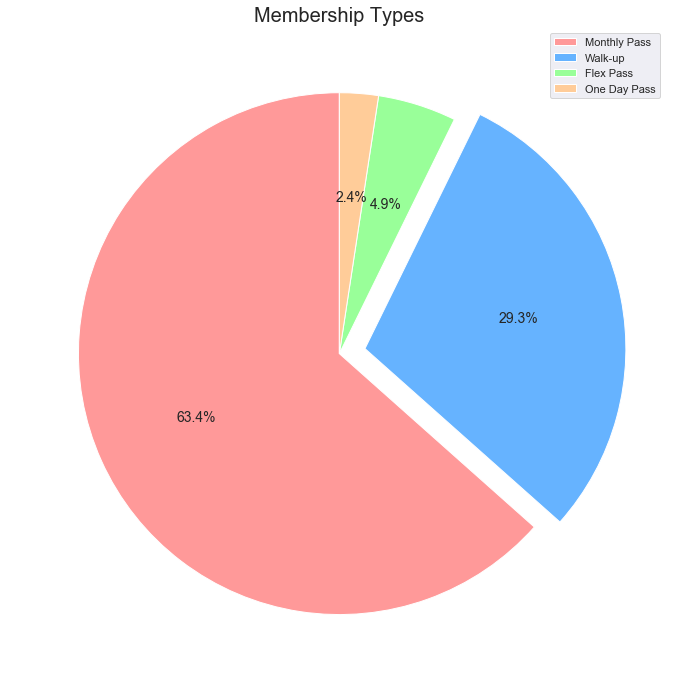

<Figure size 864x864 with 0 Axes>

In [27]:
#Plot a pie chart to represent their membership types
sns.set(rc={'figure.figsize':(12,12)})

labels = ['Monthly Pass', 'Walk-up', 'Flex Pass', 'One Day Pass']
explode = [ 0, 0.1, 0 , 0]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(membership_types, startangle=90, explode=explode, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 14}, )
plt.legend(labels, loc="upper right")
plt.title("Membership Types", fontsize=20)

plt.show()

plt.savefig('membership_types.png')

63.4% of their membership base are monthly subscribers. 29.3% are walk-ups meaning customers just purchase on the spot without any membership enrollment. Generally, a company profits when their most of their customers have a subscription-based membership.

# Date Time Format for Analysis

In [21]:
trips_clean['start_time'].head()

0    1/1/2017 0:15
1    1/1/2017 0:24
2    1/1/2017 0:28
3    1/1/2017 0:38
4    1/1/2017 0:38
Name: start_time, dtype: object

In [22]:
#Convert to datetime format so I can extract month and days 

trips_clean['start_time_dt'] = pd.to_datetime(trips_clean['start_time'])

trips_clean['end_time_dt'] = pd.to_datetime(trips_clean['end_time'])

trips_clean[['start_time_dt', 'end_time_dt']].head()

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,start_time_dt,end_time_dt
0,2017-01-01 00:15:00,2017-01-01 00:23:00
1,2017-01-01 00:24:00,2017-01-01 00:36:00
2,2017-01-01 00:28:00,2017-01-01 00:45:00
3,2017-01-01 00:38:00,2017-01-01 00:43:00
4,2017-01-01 00:38:00,2017-01-01 00:43:00


In [23]:
#Now we can extract year, month, and day once it datetime format 
trips_clean['year'] = trips_clean.start_time_dt.dt.year
trips_clean['month'] = trips_clean.start_time_dt.dt.month
trips_clean['day'] = trips_clean.start_time_dt.dt.day


#Which day has the highest volume of trips? *Days of the week where 0 is Monday and 6 is Sunday*`
trips_clean['dayofweek'] = trips_clean.start_time_dt.dt.dayofweek


C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

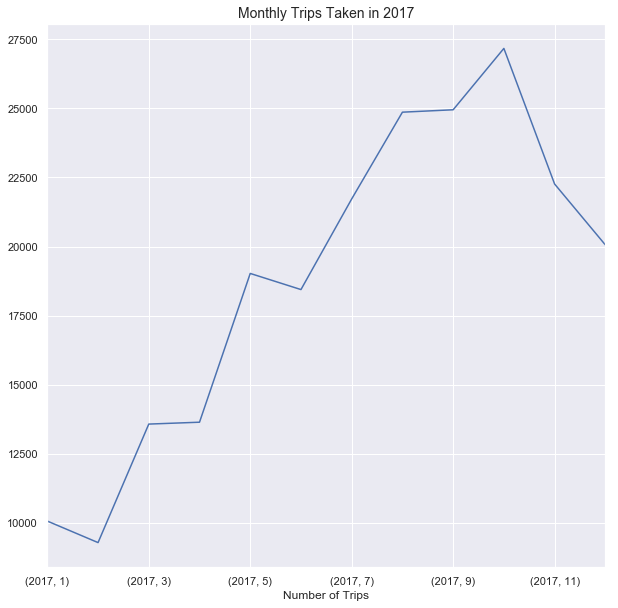

In [43]:
monthly_trips = trips_clean.groupby(['year', 'month'])['trip_id'].count()
monthly_trips.plot()
plt.xlabel('Number of Trips')
plt.title('Monthly Trips Taken in 2017', fontsize=14)
plt.savefig('monthly_trips_2017.png')

The highest number of trips were during October 2017. This high volumn of trips might be related to the moderate weather (72°), tourism, and possibly school commute. It's expected to have a low volume during the cold winter months of January and February and steadily increase as Spring arrives.

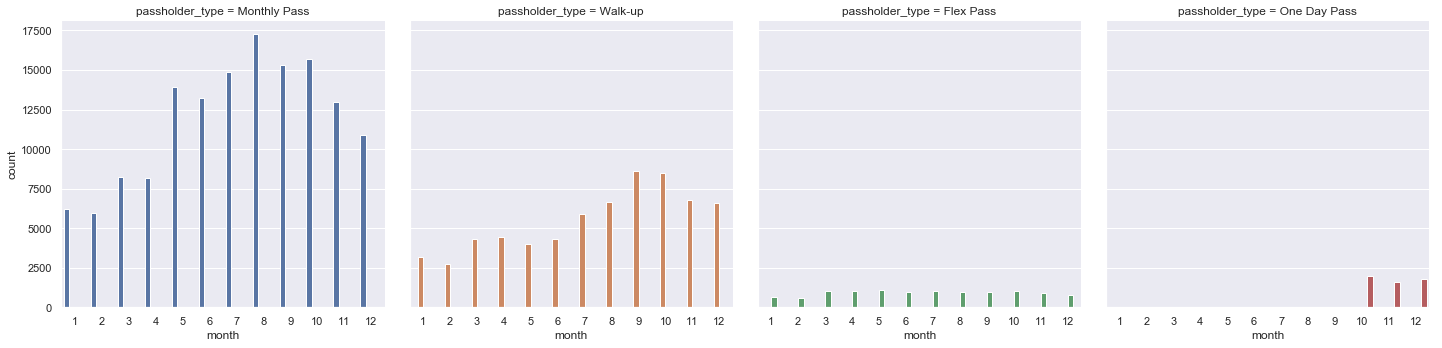

In [44]:
#Use categorical plot to view by passholder_type usage by month 
new_chart = sns.catplot(x='month', hue='passholder_type', data=trips_clean, col='passholder_type', kind= 'count')

plt.savefig('passholder_type.png')

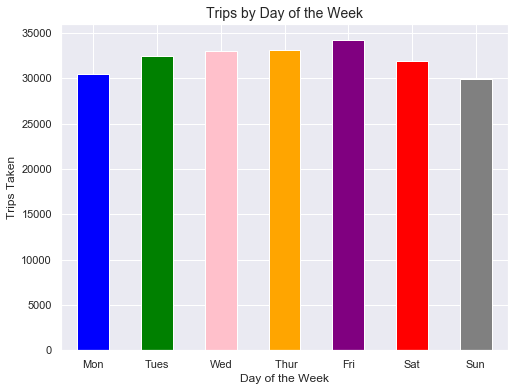

In [92]:
#Let's see which day(s) have the lowest and highest volumns
day_trips = trips_clean.groupby(['dayofweek'])['trip_id'].count()
colors = ['blue', 'green', 'pink', 'orange', 'purple', 'red', 'grey']
labels = ('Mon', 'Tues', 'Wed',' Thur','Fri','Sat', 'Sun')
position = (0, 1, 2, 3, 4, 5, 6)
day_trips.plot(kind='bar', color=colors, figsize=(8,6), rot=0)
plt.xticks(position, labels)
plt.title('Trips by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Trips Taken')
plt.savefig('daily_trips_by_week.png')

It's not suprising to see that the highest trip volume is on Friday. 

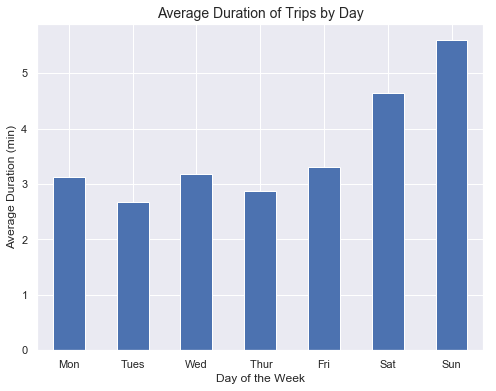

In [94]:
avg_trip_day = trips_clean.groupby(['dayofweek'])['duration_min'].mean()
labels = ('Mon', 'Tues', 'Wed',' Thur','Fri','Sat', 'Sun')
position = (0, 1, 2, 3, 4, 5, 6)
avg_trip_day.plot(kind='bar',figsize=(8,6), rot=0)
plt.xticks(position, labels)
plt.xlabel('Day of the Week')
plt.ylabel('Average Duration (min)')
plt.title('Average Duration of Trips by Day', fontsize=14)
plt.savefig('avg_trip_duration_by_day.png')

Sunday had the highest average duration of a trip. According to the total volume of rides by day, Sunday had the least amount.It's possible that customers are just taking longer trips or more traffic that contributes to the higher duration.

In [28]:
#Merge the trips and station dataframes to get starting station names 

trips_clean = trips_clean.rename(columns={'start_station_id': 'Station_ID'})

trips_clean = trips_clean.merge(stations_clean[['Station_ID', 'Station_Name']], on='Station_ID', how='left')

trips_clean = trips_clean.rename(columns ={'Station_ID' : 'Start_Station_ID',
                                          'Station_Name' : 'Station_Name_Start'})

trips_clean.head()

,trip_id,duration,start_time,end_time,Start_Station_ID,start_lat,start_lon,end_station_id,end_lat,end_lon,...,trip_route_category,passholder_type,duration_min,start_time_dt,end_time_dt,year,month,day,dayofweek,Station_Name_Start
0,17059131,480,1/1/2017 0:15,1/1/2017 0:23,3030,34.051941,-118.243530,3029,34.048851,-118.246422,...,One Way,Monthly Pass,8.0,2017-01-01 00:15:00,2017-01-01 00:23:00,2017,1,1,6,Main & 1st
1,17059130,720,1/1/2017 0:24,1/1/2017 0:36,3028,34.058319,-118.246094,3028,34.058319,-118.246094,...,Round Trip,Walk-up,12.0,2017-01-01 00:24:00,2017-01-01 00:36:00,2017,1,1,6,Grand & Temple
2,17059129,1020,1/1/2017 0:28,1/1/2017 0:45,3027,34.049980,-118.247162,3018,34.043732,-118.260139,...,One Way,Walk-up,17.0,2017-01-01 00:28:00,2017-01-01 00:45:00,2017,1,1,6,Spring & 3rd
3,17059128,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,...,One Way,Monthly Pass,5.0,2017-01-01 00:38:00,2017-01-01 00:43:00,2017,1,1,6,5th & Grand
4,17059127,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,...,One Way,Monthly Pass,5.0,2017-01-01 00:38:00,2017-01-01 00:43:00,2017,1,1,6,5th & Grand


In [50]:
# #Merge the trips and station dataframes to get ending station names 
trips_clean = trips_clean.rename(columns={'end_station_id':'End_Station_ID'})

stations_clean = stations_clean.rename(columns={'Station_ID' : 'End_Station_ID'})

trips_clean = trips_clean.merge(stations_clean[['End_Station_ID', 'Station_Name']], on='End_Station_ID', how='left')

trips_clean = trips_clean.rename(columns={'Station_Name': 'Station_Name_End'})

trips_clean.head()

,trip_id,duration,start_time,end_time,Start_Station_ID,start_lat,start_lon,End_Station_ID,end_lat,end_lon,...,start_time_dt,end_time_dt,year,month,day,dayofweek,Station_Name_Start,Station_Name_End,route,Station_Name_End
0,17059131,480,1/1/2017 0:15,1/1/2017 0:23,3030,34.051941,-118.243530,3029,34.048851,-118.246422,...,2017-01-01 00:15:00,2017-01-01 00:23:00,2017,1,1,6,Main & 1st,Main & 4th,Main & 1st-->Main & 4th,Main & 4th
1,17059130,720,1/1/2017 0:24,1/1/2017 0:36,3028,34.058319,-118.246094,3028,34.058319,-118.246094,...,2017-01-01 00:24:00,2017-01-01 00:36:00,2017,1,1,6,Grand & Temple,Grand & Temple,Grand & Temple-->Grand & Temple,Grand & Temple
2,17059129,1020,1/1/2017 0:28,1/1/2017 0:45,3027,34.049980,-118.247162,3018,34.043732,-118.260139,...,2017-01-01 00:28:00,2017-01-01 00:45:00,2017,1,1,6,Spring & 3rd,Grand & Olympic,Spring & 3rd-->Grand & Olympic,Grand & Olympic
3,17059128,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,...,2017-01-01 00:38:00,2017-01-01 00:43:00,2017,1,1,6,5th & Grand,7th & Spring,5th & Grand-->7th & Spring,7th & Spring
4,17059127,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,...,2017-01-01 00:38:00,2017-01-01 00:43:00,2017,1,1,6,5th & Grand,7th & Spring,5th & Grand-->7th & Spring,7th & Spring


# Popular Start & End Stations

In [30]:
#Lets see which is the most popular start stations 

pop_start_station = trips_clean.groupby(['Station_Name_Start'])['trip_id'].count().sort_values(ascending=False)


pop_start_stations = pop_start_station[:50]
pop_start_stations

Station_Name_Start
7th & Flower                               8891
Traction & Rose                            7069
Grand & 7th                                6946
Union Station West Portal                  6542
7th & Spring                               6388
Broadway & 3rd                             6306
Main & 1st                                 6209
Grand & 3rd                                5899
1st & Central                              5394
Main & 6th                                 4970
3rd & Santa Fe                             4893
Figueroa & 8th                             4857
2nd & Figueroa                             4536
Main & 5th                                 4476
5th & Grand                                4281
Ocean Front Walk & Navy                    4250
5th & Hewitt                               4227
7th & Main                                 4047
Olive & 8th                                3825
Hope & 11th                                3812
Olive & 5th          

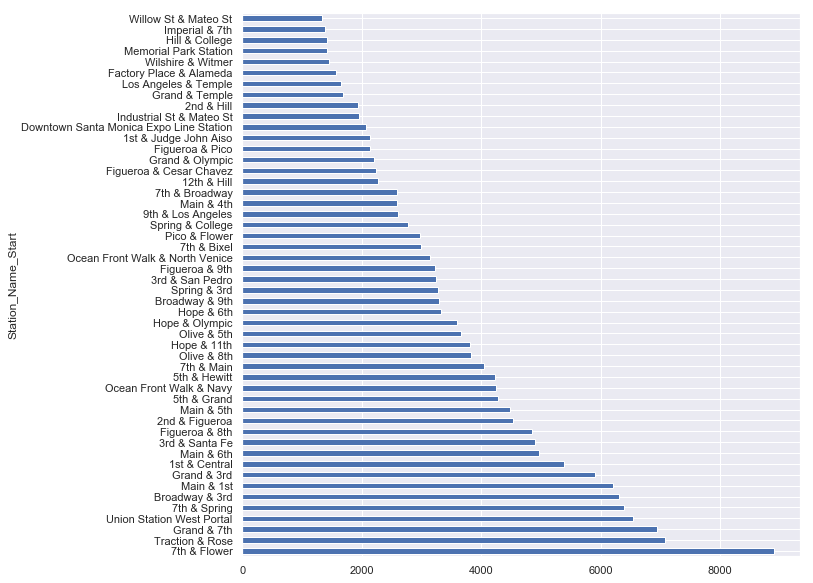

In [31]:
pop_start_stations.plot.barh()

In [33]:
trips_clean.head()

,trip_id,duration,start_time,end_time,Start_Station_ID,start_lat,start_lon,End_Station_ID,end_lat,end_lon,...,passholder_type,duration_min,start_time_dt,end_time_dt,year,month,day,dayofweek,Station_Name_Start,Station_Name_End
0,17059131,480,1/1/2017 0:15,1/1/2017 0:23,3030,34.051941,-118.243530,3029,34.048851,-118.246422,...,Monthly Pass,8.0,2017-01-01 00:15:00,2017-01-01 00:23:00,2017,1,1,6,Main & 1st,Main & 4th
1,17059130,720,1/1/2017 0:24,1/1/2017 0:36,3028,34.058319,-118.246094,3028,34.058319,-118.246094,...,Walk-up,12.0,2017-01-01 00:24:00,2017-01-01 00:36:00,2017,1,1,6,Grand & Temple,Grand & Temple
2,17059129,1020,1/1/2017 0:28,1/1/2017 0:45,3027,34.049980,-118.247162,3018,34.043732,-118.260139,...,Walk-up,17.0,2017-01-01 00:28:00,2017-01-01 00:45:00,2017,1,1,6,Spring & 3rd,Grand & Olympic
3,17059128,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,...,Monthly Pass,5.0,2017-01-01 00:38:00,2017-01-01 00:43:00,2017,1,1,6,5th & Grand,7th & Spring
4,17059127,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,...,Monthly Pass,5.0,2017-01-01 00:38:00,2017-01-01 00:43:00,2017,1,1,6,5th & Grand,7th & Spring


In [34]:
pop_end_station = trips_clean.groupby(['Station_Name_End'])['trip_id'].count().sort_values(ascending=False)

pop_end_stations = pop_end_station[:50]
pop_end_stations

Station_Name_End
7th & Flower                               10409
Traction & Rose                             8235
Union Station West Portal                   7344
7th & Spring                                7309
1st & Central                               6871
Grand & 7th                                 6862
Broadway & 3rd                              6769
Figueroa & 8th                              5404
3rd & Santa Fe                              5290
Main & 1st                                  5209
Olive & 5th                                 5063
5th & Hewitt                                4449
Main & 6th                                  4437
Main & 5th                                  4406
Hope & 11th                                 4099
Hope & 6th                                  4065
Downtown Santa Monica Expo Line Station     3981
Olive & 8th                                 3920
Broadway & 9th                              3700
Ocean Front Walk & Navy                     3567
2nd

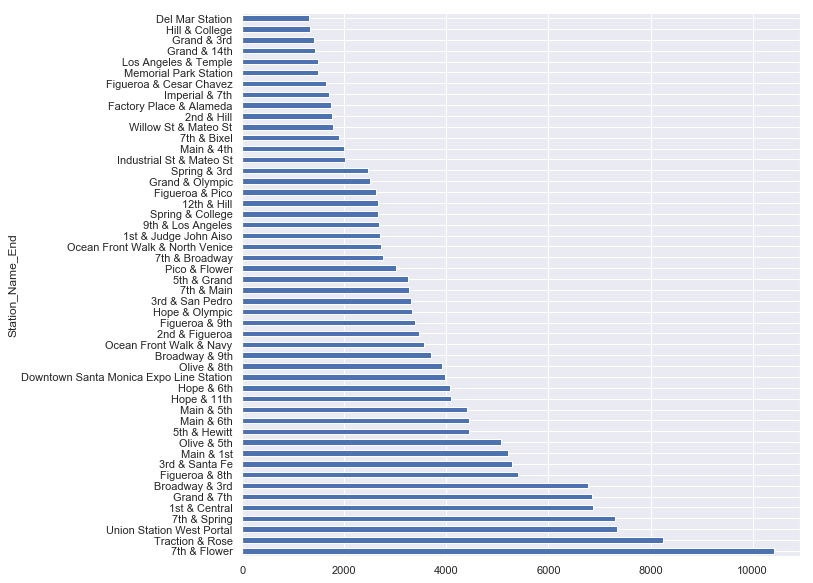

In [35]:
pop_end_stations.plot.barh()

# Route Frequency

In [41]:
#Let see the most popular Routes  

trips_clean['route'] = trips_clean['Station_Name_Start'] + '-->' + trips_clean['Station_Name_End']
trips_clean.head()

,trip_id,duration,start_time,end_time,Start_Station_ID,start_lat,start_lon,End_Station_ID,end_lat,end_lon,...,duration_min,start_time_dt,end_time_dt,year,month,day,dayofweek,Station_Name_Start,Station_Name_End,route
0,17059131,480,1/1/2017 0:15,1/1/2017 0:23,3030,34.051941,-118.243530,3029,34.048851,-118.246422,...,8.0,2017-01-01 00:15:00,2017-01-01 00:23:00,2017,1,1,6,Main & 1st,Main & 4th,Main & 1st-->Main & 4th
1,17059130,720,1/1/2017 0:24,1/1/2017 0:36,3028,34.058319,-118.246094,3028,34.058319,-118.246094,...,12.0,2017-01-01 00:24:00,2017-01-01 00:36:00,2017,1,1,6,Grand & Temple,Grand & Temple,Grand & Temple-->Grand & Temple
2,17059129,1020,1/1/2017 0:28,1/1/2017 0:45,3027,34.049980,-118.247162,3018,34.043732,-118.260139,...,17.0,2017-01-01 00:28:00,2017-01-01 00:45:00,2017,1,1,6,Spring & 3rd,Grand & Olympic,Spring & 3rd-->Grand & Olympic
3,17059128,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,...,5.0,2017-01-01 00:38:00,2017-01-01 00:43:00,2017,1,1,6,5th & Grand,7th & Spring,5th & Grand-->7th & Spring
4,17059127,300,1/1/2017 0:38,1/1/2017 0:43,3007,34.050480,-118.254593,3031,34.044701,-118.252441,...,5.0,2017-01-01 00:38:00,2017-01-01 00:43:00,2017,1,1,6,5th & Grand,7th & Spring,5th & Grand-->7th & Spring


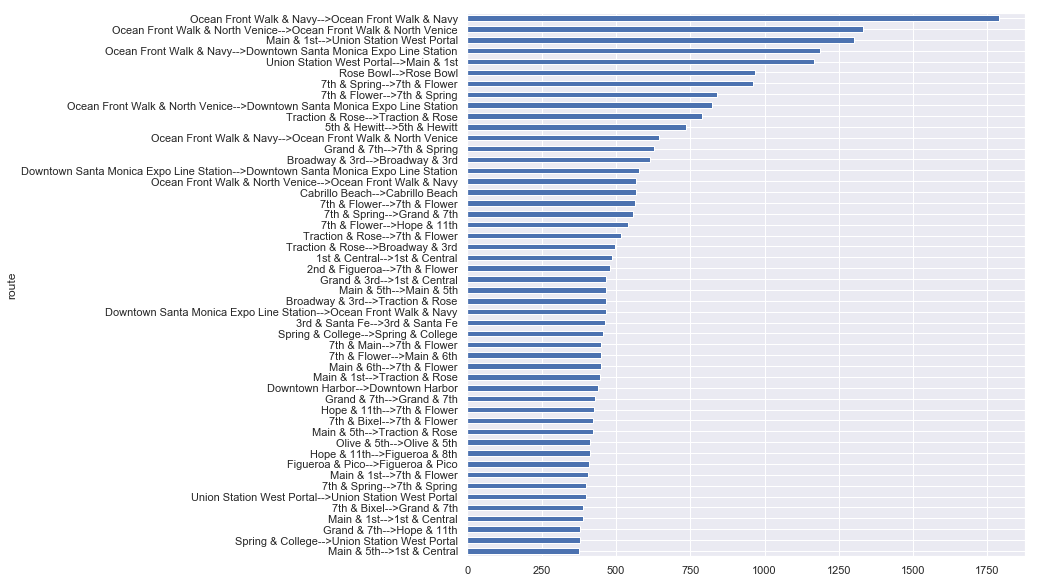

In [59]:
route_freq = trips_clean.groupby(['route'])['trip_id'].count().sort_values()[-50:]

route_freq.plot.barh()

# Geographical Visualizations

In [77]:
#Use folium to get a map. We will create a function with the 'average' start lat and start lon coordinates 

def get_base_map(trips_clean):
    return folium.Map(location=[trips_clean['start_lat'].mean(), trips_clean['start_lon'].mean()],
                     zoom_start=12)


#Get base map 

base_map = get_base_map(trips_clean)
base_map 

In [78]:
# #Let visualize the start stations with markers 

def station_markers(initial_map, trips_clean):
    station_df = trips_clean.drop_duplicates(subset=['Start_Station_ID'])
    out_map = initial_map 
    for lat, lon, name in zip(station_df['start_lat'], station_df['start_lon'], station_df['Station_Name_Start']):
        out_map.add_child(folium.Marker(location =[lat, lon],icon=folium.Icon(color='blue', icon='star'), popup=(folium.Popup(name))))
    return out_map

markers = station_markers(base_map, trips_clean)

markers 


In [79]:
base_map.add_child(MeasureControl())
base_map

In [40]:
#convert to (n, 2) nd-array format for heatmap, taken from https://alysivji.github.io/getting-started-with-folium.html

stationArr = trips_clean[['start_lat', 'start_lon']][:40000].values

get_base_map(trips_clean).add_child(plugins.HeatMap(stationArr, radius= 50, max_val=400))